## Plotting and comparing the implemented jet substructure modules

In [31]:
using Plots
using CurveFit
using CSV, DataFrames
using StatsPlots


In [66]:
dataP = CSV.read("./results/massdrop-python.csv", DataFrame, header=true, delim=",")
dataJ = CSV.read("./results/massdrop-julia.csv", DataFrame, header=true, delim=",");


LinearFit{Float64}((-4.3492339429579487e-7, 1.0000001420262912))


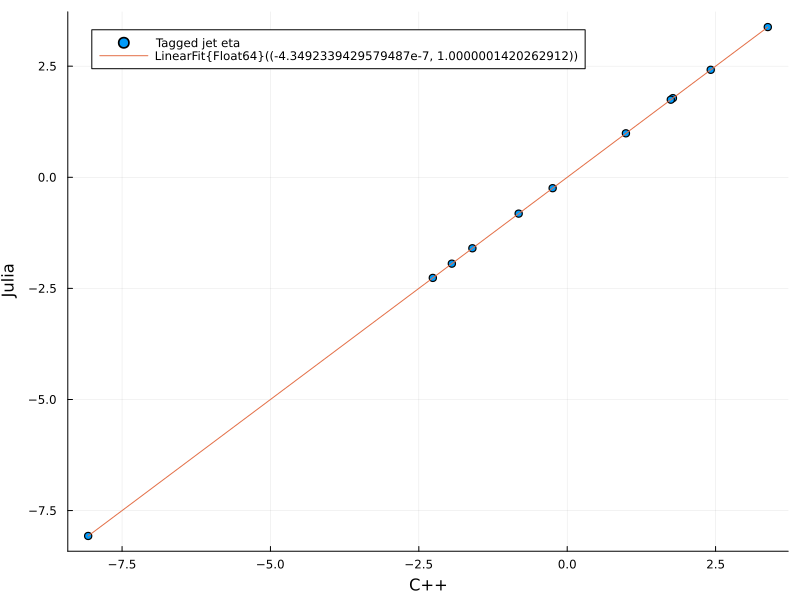

In [72]:
x = dataJ[!, :eta]
y = dataP[!, :eta]

scatter(x, y, label="Tagged jet eta", xlabel="C++", ylabel="Julia", size=(800,600))

fit = curve_fit(LinearFit, x, y)
X = range(minimum(x), maximum(x), 50)
Y = fit.(X)
println(fit)
plot!(X,Y, label="$(fit)")


In [73]:
savefig("./results/plot-softdrop-eta.png")


"/Users/sattwamoghosh/juliaHEP/results/plot-softdrop-eta.png"

In [62]:
dataP = CSV.read("./results/time-massdrop-python.csv", DataFrame, header=true, delim=",")
dataJ = CSV.read("./results/time-massdrop-julia.csv", DataFrame, header=true, delim=",");


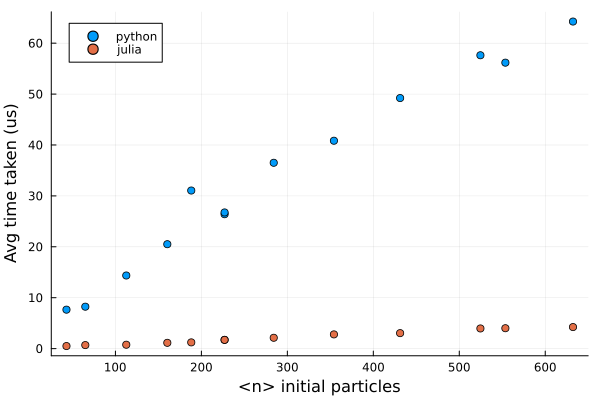

In [63]:
@df dataP scatter(:mean_particles, :time_per_event, label="python", xlabel="<n> initial particles", ylabel="Avg time taken (us)")
# @df dataP plot!(:mean_particles, :time_per_event, label="")
@df dataJ scatter!(:mean_particles, :time_per_event, label="julia")
# @df dataJ plot!(:mean_particles, :time_per_event, label="")

In [64]:
savefig("./results/time-massdrop.png")

"/Users/sattwamoghosh/juliaHEP/results/time-massdrop.png"